## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy
import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Merge the 12 months of data into a single CSV file

In [2]:
files = [file for file in os.listdir('./Cyclic_Data')]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('./Cyclic_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])
# Save all_months_data as csv
all_months_data.to_csv('all_data.csv', index=False)

## Read new CSV file

In [3]:
df = pd.read_csv('all_data.csv')
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


## Clean data!

##### Convert 'started_at' and 'ended_at' columns from string to datetime format

In [4]:
df['started_at']=pd.to_datetime(df['started_at'])
df['ended_at']=pd.to_datetime(df['ended_at'])
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


##### Rename 'member_casual' column to 'rider_type'

In [5]:
df.rename(columns = {'member_casual':'rider_type',
                    'rideable_type':'bike_type'}, inplace = True)
df.head()

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,rider_type
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


##### Drop irrelevant columns

In [6]:
# This will show an error when re-run because columns have already been dropped
df.drop(['start_station_name','start_station_id','end_station_name','end_station_id','start_lat','start_lng','end_lat','end_lng'], axis=1, inplace=True)
df.head()

,ride_id,bike_type,started_at,ended_at,rider_type
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,casual


##### Add 'ride_length' column

In [7]:
df['ride_length'] = df['ended_at'] - df['started_at']
df.head()

,ride_id,bike_type,started_at,ended_at,rider_type,ride_length
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,member,0 days 00:10:25
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,member,0 days 00:04:04
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,member,0 days 00:01:20
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,member,0 days 00:11:42
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,casual,0 days 00:00:43


##### Add 'ride_length_minutes' column

In [8]:
df['ride_length_minutes'] = df['ride_length'].dt.total_seconds()/60
df.head()

,ride_id,bike_type,started_at,ended_at,rider_type,ride_length,ride_length_minutes
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,member,0 days 00:10:25,10.416667
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,member,0 days 00:04:04,4.066667
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,member,0 days 00:01:20,1.333333
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,member,0 days 00:11:42,11.700000
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,casual,0 days 00:00:43,0.716667


##### Add 'day_of_week' column

In [9]:
# Split date from time from 'started_at' column and use it to create a 'day_of_week' column
df['date_started'] = pd.to_datetime(df['started_at']).dt.date
df['day_of_week'] = pd.to_datetime(df['date_started'], format= '%Y-%m-%d').dt.day_name()
df['month'] = pd.to_datetime(df['date_started'], format= '%Y-%m-%d').dt.month_name()
df['year'] = pd.to_datetime(df['date_started'], format= '%Y-%m-%d').dt.year
df.head()

,ride_id,bike_type,started_at,ended_at,rider_type,ride_length,ride_length_minutes,date_started,day_of_week,month,year
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,member,0 days 00:10:25,10.416667,2021-01-23,Saturday,January,2021
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,member,0 days 00:04:04,4.066667,2021-01-27,Wednesday,January,2021
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,member,0 days 00:01:20,1.333333,2021-01-21,Thursday,January,2021
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,member,0 days 00:11:42,11.700000,2021-01-07,Thursday,January,2021
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,casual,0 days 00:00:43,0.716667,2021-01-23,Saturday,January,2021


## Data Exploration

### Question 1: What was the average ride duration per month?

In [10]:
# Arrange the months in the right order
df['month'] = pd.Categorical(df['month'], ordered=True, categories= ['January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November', 'December'])
df.pivot_table(index='month', columns='rider_type', values='ride_length_minutes')

rider_type,casual,member
month,,
January,25.684590,12.871936
February,49.373229,18.022085
March,38.158731,13.969955
April,38.022990,14.688832
May,38.230966,14.638909
June,37.121432,14.677786
July,32.790172,14.239318
August,28.786370,14.100812
September,27.814990,13.734457


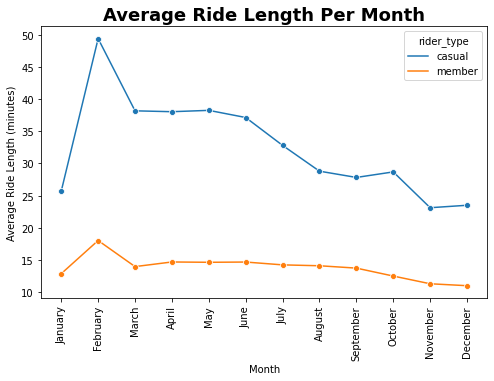

In [11]:
table = pd.pivot_table(df, index=['rider_type', 'month'], values='ride_length_minutes')

plt.figure(figsize=(8,5))
ax = sns.lineplot(data=table.reset_index(), x='month', y='ride_length_minutes', hue='rider_type', marker="o")
plt.title('Average Ride Length Per Month', fontdict={'fontweight':'bold', 'fontsize':18})
plt.xticks (rotation='vertical', size=10)
plt.xlabel("Month")
plt.ylabel("Average Ride Length (minutes)")

plt.show()

### Question 2: What was the average ride duration per day?

In [12]:
# Arrange the weekdays in the right order
df['day_of_week'] = pd.Categorical(df['day_of_week'], ordered=True, categories= ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

df.pivot_table(index='day_of_week', columns='rider_type', values='ride_length_minutes')

rider_type,casual,member
day_of_week,,
Sunday,37.560842,15.654505
Monday,31.875108,13.247270
Tuesday,27.971903,12.788000
Wednesday,27.657107,12.818074
Thursday,27.703258,12.776068
Friday,30.348175,13.324757
Saturday,34.705858,15.264353


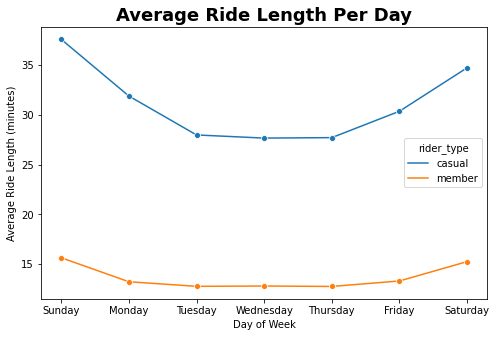

In [13]:
table = pd.pivot_table(df, index=['rider_type', 'day_of_week'], values='ride_length_minutes')

plt.figure(figsize=(8,5))
ax = sns.lineplot(data=table.reset_index(), x='day_of_week', y='ride_length_minutes', hue='rider_type', marker="o")
plt.title('Average Ride Length Per Day', fontdict={'fontweight':'bold', 'fontsize':18})
plt.xlabel("Day of Week")
plt.ylabel("Average Ride Length (minutes)")

plt.show()

### Question 3: How many rides were booked per day by Casual or Member riders?

In [14]:
df['day_of_week'] = pd.Categorical(df['day_of_week'], ordered=True, categories= ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
df.pivot_table(index='day_of_week', columns='rider_type', values='ride_id', aggfunc='count')

rider_type,casual,member
day_of_week,,
Sunday,481143,376142
Monday,286376,416212
Tuesday,274392,465513
Wednesday,278950,477192
Thursday,286064,451524
Friday,364080,446428
Saturday,558000,433047


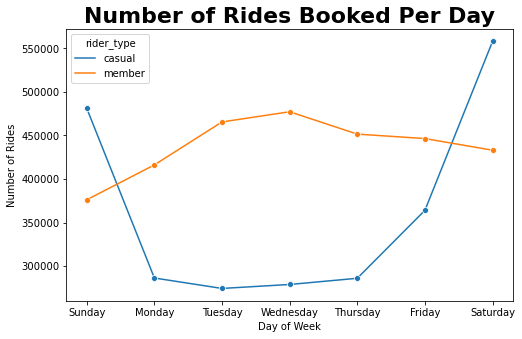

In [15]:
table = pd.pivot_table(df, index=['rider_type', 'day_of_week'], values='ride_id', aggfunc='count')

plt.figure(figsize=(8,5))
ax = sns.lineplot(data=table.reset_index(), x='day_of_week', y='ride_id', hue='rider_type', marker="o")
plt.title('Number of Rides Booked Per Day', fontdict={'fontweight':'bold', 'fontsize':22})
plt.xlabel("Day of Week")
plt.ylabel("Number of Rides")

plt.show()

### Question 3: How many rides were booked per month by Casual or Member riders?

In [16]:
df.pivot_table(index='month', columns='rider_type', values='ride_id', aggfunc='count')

rider_type,casual,member
month,,
January,18117,78717
February,10131,39491
March,84033,144463
April,136601,200629
May,256916,274717
June,370681,358914
July,442056,380354
August,412671,391681
September,363890,392257


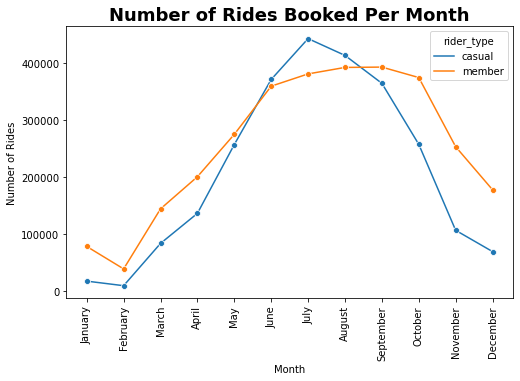

In [17]:
table = pd.pivot_table(df, index=['rider_type', 'month'], values='ride_id', aggfunc='count')

plt.figure(figsize=(8,5))
ax = sns.lineplot(data=table.reset_index(), x='month', y='ride_id', hue='rider_type', marker="o")
plt.title('Number of Rides Booked Per Month', fontdict={'fontweight':'bold', 'fontsize':18})
plt.xticks (rotation='vertical', size=10)
plt.xlabel("Month")
plt.ylabel("Number of Rides")

plt.show()

### Question 5: What is the total number of rides booked per month?

In [18]:
df.pivot_table(index='month', values='ride_id', aggfunc='count')

,ride_id
month,
January,96834
February,49622
March,228496
April,337230
May,531633
June,729595
July,822410
August,804352
September,756147


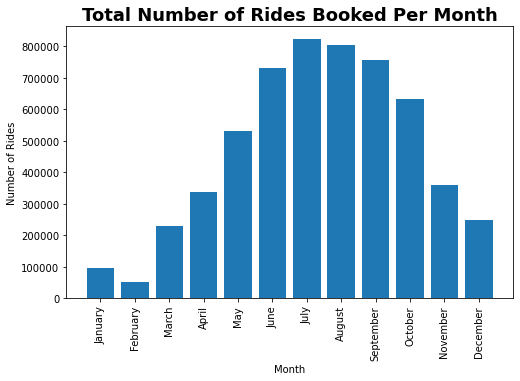

In [19]:
group = df.groupby('month').count()

plt.figure(figsize=(8,5))
month = [month for month, df in df.groupby('month')] # This arranges the months in the right order
plt.title('Total Number of Rides Booked Per Month', fontdict={'fontweight':'bold', 'fontsize':18})
plt.bar(month, group['ride_id'])
plt.xticks(month, rotation='vertical', size=10)
plt.ylabel('Number of Rides')
plt.xlabel('Month')
plt.ticklabel_format(useOffset=False, style='plain', axis='y') #Make value on y axis to be plain and not exponential

plt.show()

### Question 6: What is the total number of rides booked per day?

In [20]:
df['day_of_week'] = pd.Categorical(df['day_of_week'], ordered=True, categories= ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
df.pivot_table(index='day_of_week', values='ride_id', aggfunc='count')

,ride_id
day_of_week,
Sunday,857285
Monday,702588
Tuesday,739905
Wednesday,756142
Thursday,737588
Friday,810508
Saturday,991047


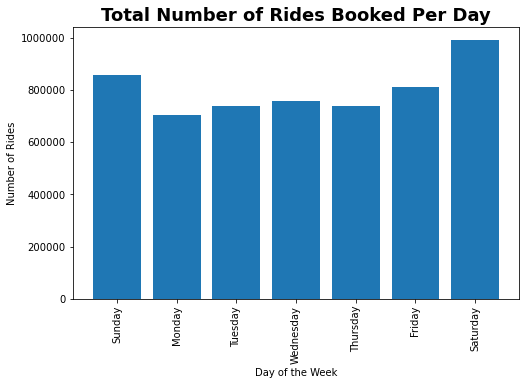

In [21]:
group = df.groupby('day_of_week').count()

plt.figure(figsize=(8,5))
weekday = [weekday for weekday, df in df.groupby('day_of_week')] # This arranges the weekdays in the right order
plt.title('Total Number of Rides Booked Per Day', fontdict={'fontweight':'bold', 'fontsize':18})
plt.bar(weekday, group['ride_id'])
plt.xticks(weekday, rotation='vertical', size=10)
plt.ylabel('Number of Rides')
plt.xlabel('Day of the Week')
plt.ticklabel_format(useOffset=False, style='plain', axis='y') #Make value on y axis to be plain and not exponential

plt.show()

### Question 7: What type of bike was mostly used?

In [22]:
df.pivot_table(index='bike_type', columns='rider_type', values='ride_length_minutes')

rider_type,casual,member
bike_type,,
classic_bike,28.929319,14.146344
docked_bike,81.493302,2.633333
electric_bike,19.824349,12.690820


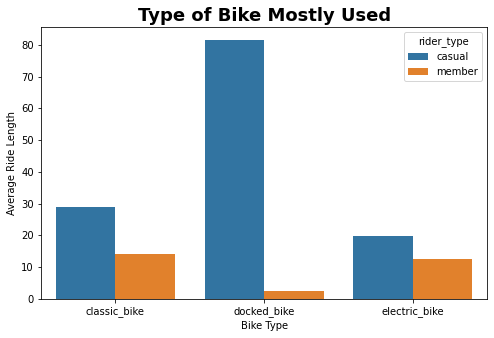

In [23]:
table = pd.pivot_table(df, index=['bike_type', 'rider_type'], values='ride_length_minutes')

plt.figure(figsize=(8,5))
ax = sns.barplot(data=table.reset_index(), x='bike_type', y='ride_length_minutes', hue='rider_type')
plt.title('Type of Bike Mostly Used', fontdict={'fontweight':'bold', 'fontsize':18})

plt.xlabel("Bike Type")
plt.ylabel("Average Ride Length")

plt.show()

## Questions asked from the analysis:

### “Why did February have the least amount of rides booked even though it had the longest ride durations?”

Few rides were booked in February because people don't usually enjoy riding bikes in the winter due to the cold and unclear weather conditions but the rides lasted longer than usual because most rides were booked by riders participating in outdoor activities like the "Winter Cycle Touring"  

##### “Why did casual riders book more rides during the weekend while member riders booked more rides on weekdays?”

Casual riders booked more rides during the weekend because they mostly use the bikes for leisure while Member riders book more rides becasuse they use the bikes to commute to work.

##### “Why were more rides booked in June, July, august, September & October than in January and February?”

More rides were booked in June, July, August, September & October because these months cover Summer to Fall which are the best times for cycling due to the favourable weather conditions.

##### “Why do casual riders use more docked bikes than classic and electric bikes?”

Casual riders us more docked bikes than classic and electric bikes docked bikes are easily accessible. You can get bikes at any docking station unlike Casual and Electric bikes which are mostly undocked so they are parkede wherever making it difficult to access.

##### “Why do member riders use more classic and electric bikes than docked bikes?”

Member riders use more Classic and Electric bikes because the classic bikes are cost effficient as they are mostly undocked so you can just park it anywhere and not bother about docking it at a docking station before the time runs out. They also use electric bikes because they are fast and help them commute to work faster with less energy spent cycling.